In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
import missingno as msno

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [4]:
df.shape

(887379, 74)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  int64  
 3   funded_amnt                  887379 non-null  int64  
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


The loan amount highest is 35,0000 The Highest intrest rate is 28.9%

In [7]:
df.describe(include='O')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,887379,887379,887379,835917,842554,887379,887379,887379,887379,887379,...,887227,887379,887379,887350,887379,869720,634408,887326,887379,511
unique,2,7,35,299269,11,6,3,103,10,2,...,63106,935,51,697,2,98,100,103,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,01-10-2015,Current,n,...,Debt consolidation,945xx,CA,Aug-01,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,48631,601779,887369,...,414001,9770,129517,6659,456848,470150,553406,730574,886868,283


In [8]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

# EDA

### NULL Values

In [9]:
null=df.isnull().sum()
Null=pd.DataFrame(null[null>0],columns=['Total'])

In [10]:
percentage=(df.isnull().sum()/len(df))*100
Percentage=pd.DataFrame(percentage[percentage>0],columns=['Percentage'])

In [11]:
Null_values=pd.concat([Null,Percentage],axis=1)

In [12]:
Null_values

,Total,Percentage
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
desc,761351,85.797726
title,152,0.017129
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
mths_since_last_record,750326,84.555303


# Before Cleaning the Data 

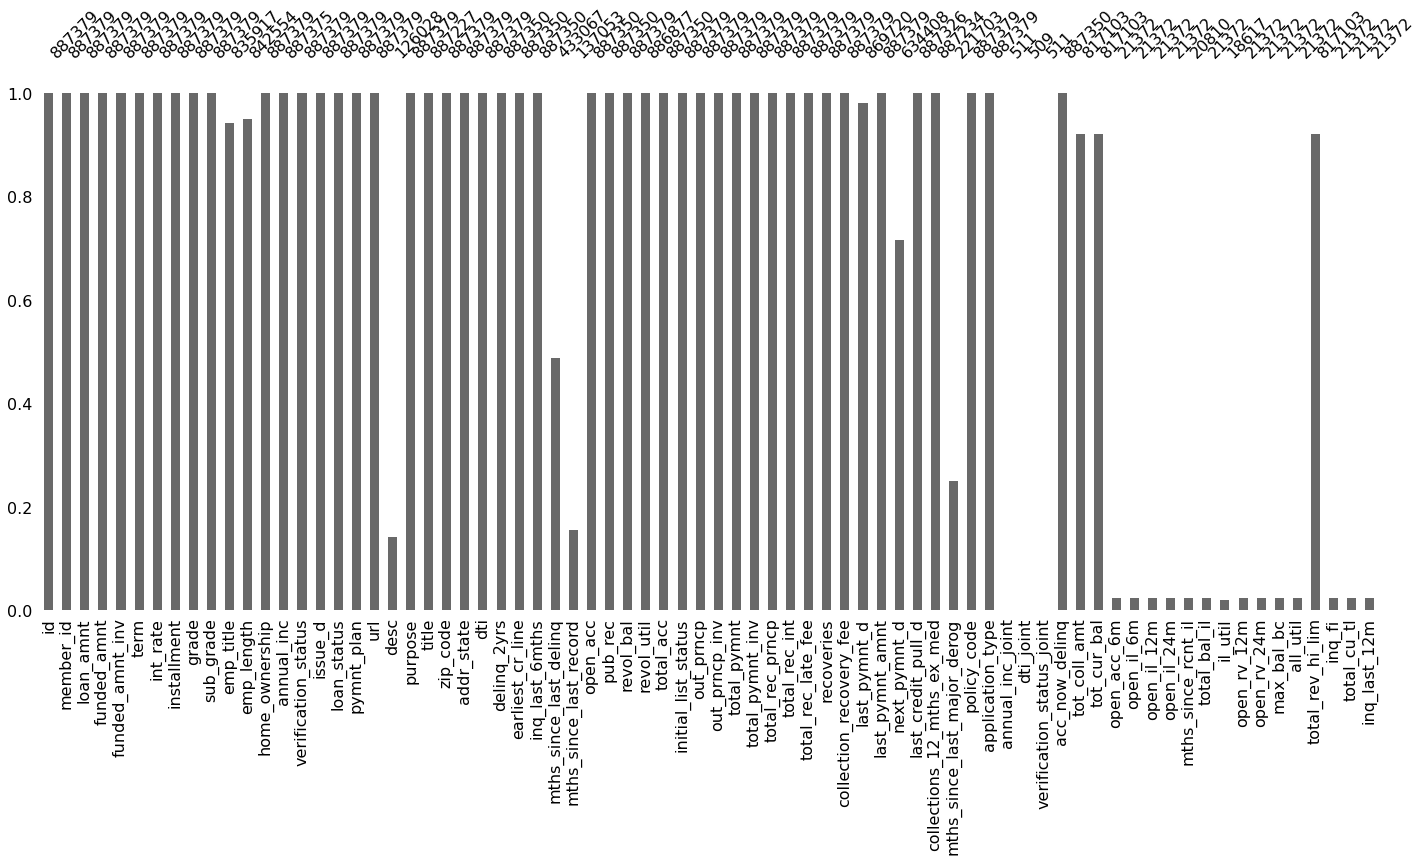

In [13]:
msno.bar(df)
plt.show()

# Target Variable

In [14]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

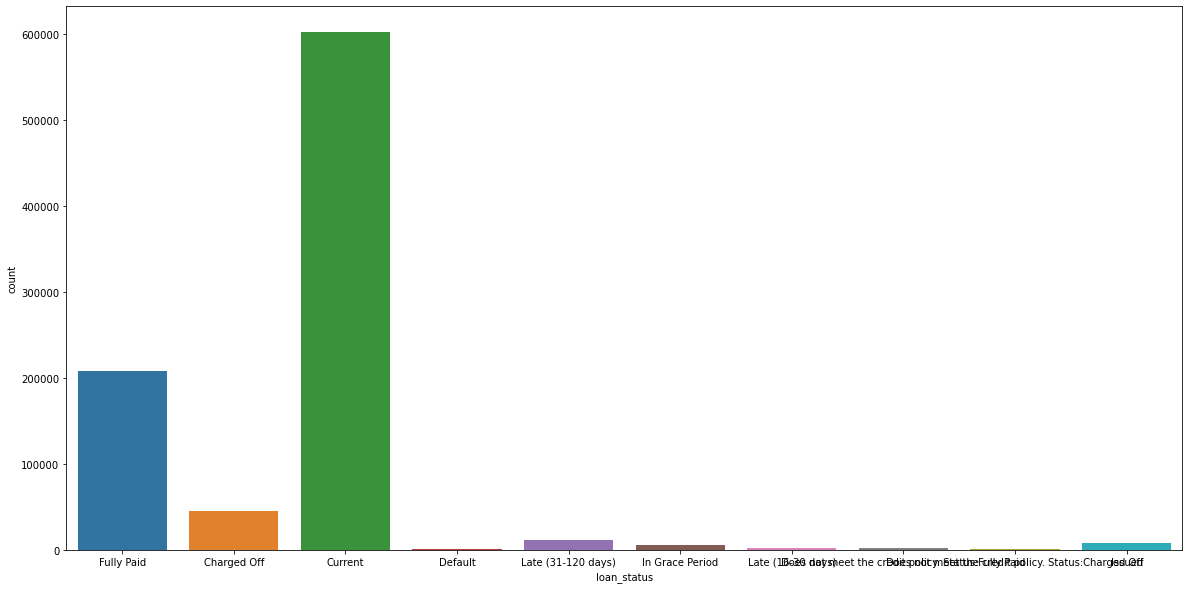

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(df['loan_status'])
plt.show()

Most of the loans in the dataset are Current and the second largest category is Fully Paid loans. The third is charged off loans (never paid), and it is a quite large number in terms of loan counts.

# Loan amount and Funded amount

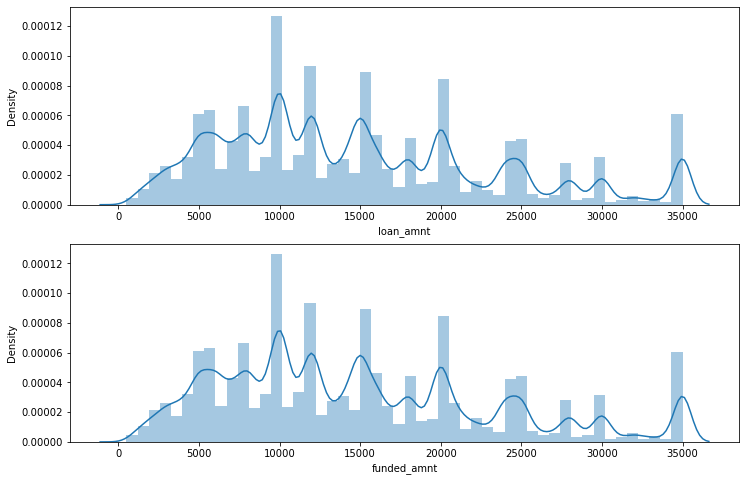

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1), sns.distplot(df['loan_amnt'])
plt.subplot(2,1,2), sns.distplot(df['funded_amnt'])
plt.show()

The loam amount and funded amount have similar distibution that means the most of the are accepted

# Loan Amount and Installment Relation

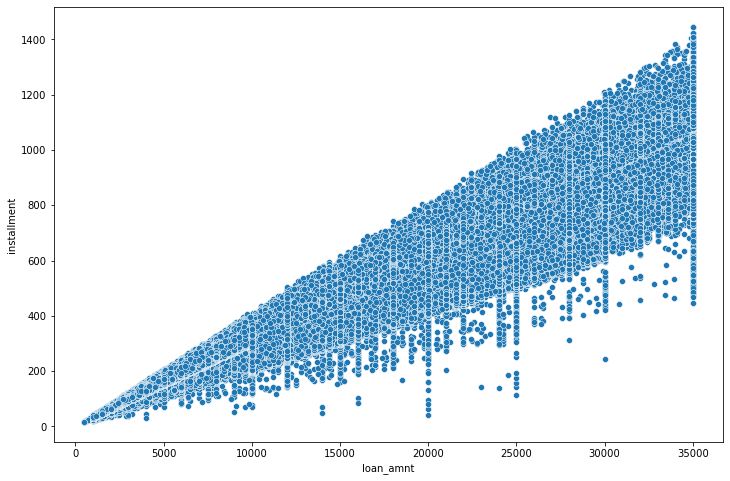

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='loan_amnt',y='installment',data=df)
plt.show()

Loan amount and installment has linear relationship

# Loan Amount and Intrest Rate Relation

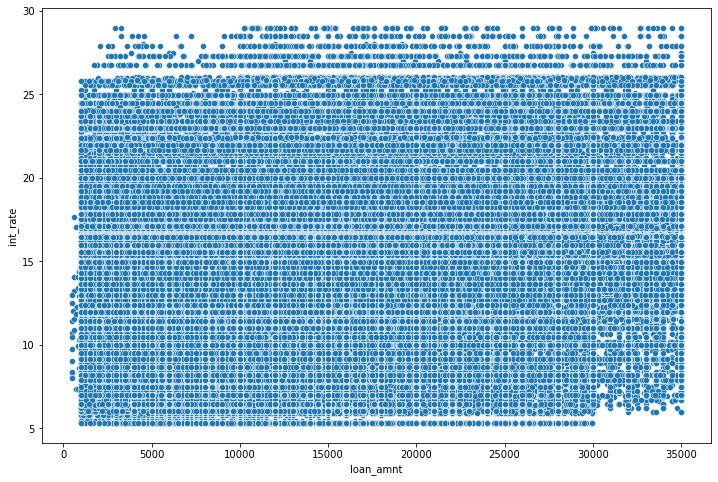

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='loan_amnt',y='int_rate',data=df)
plt.show()

# Loan Amount and Annual Income Relation

In [19]:
df['annual_inc'].mean()

75027.58776076681

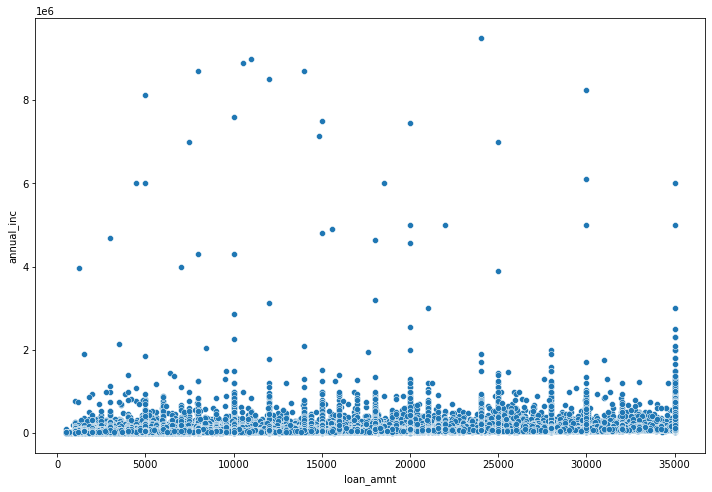

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['loan_amnt'], df['annual_inc'])
plt.show()

# Distribution of Loan Purpose

In [21]:
loan_purpose= df['purpose'].value_counts().to_frame().reset_index()
loan_purpose.columns = ['Loan Purpose', 'Count']
loan_purpose

,Loan Purpose,Count
0,debt_consolidation,524215
1,credit_card,206182
2,home_improvement,51829
3,other,42894
4,major_purchase,17277
5,small_business,10377
6,car,8863
7,medical,8540
8,moving,5414
9,vacation,4736


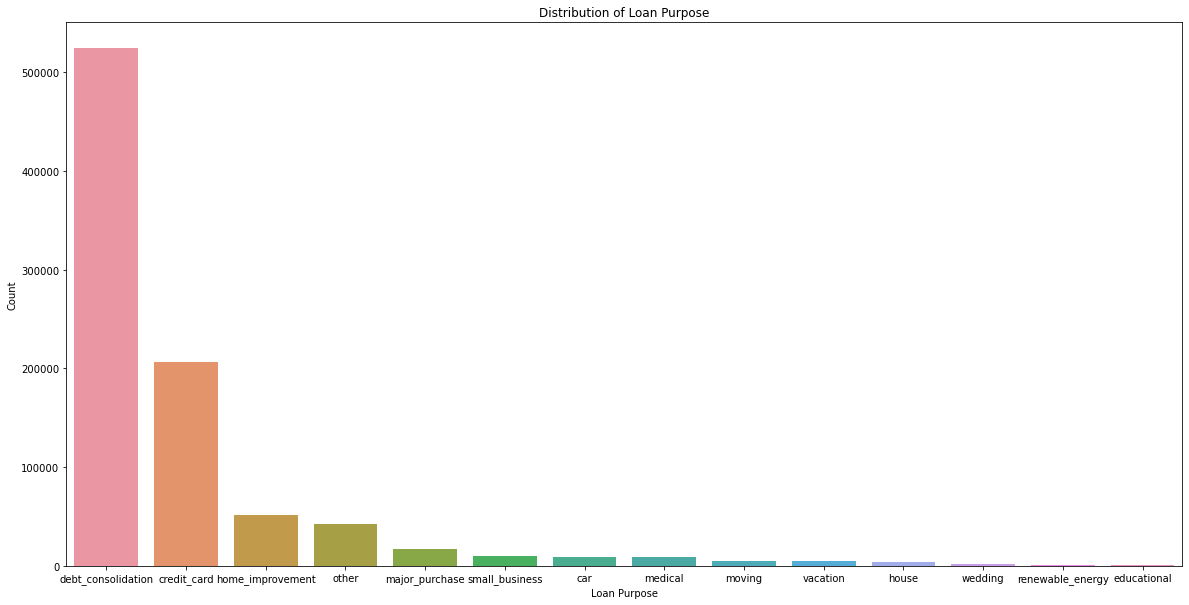

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(y='Count', x='Loan Purpose', data=loan_purpose)
plt.ylabel('Count')
plt.title('Distribution of Loan Purpose')
plt.show()

The highest purpose of taking loan is Debt consolidation, next Credit card and follows to Home improvement Purpose

# Grade

In [23]:
grade = df['grade'].value_counts().to_frame().reset_index()
grade.columns = ['Grade', 'Count']
grade

,Grade,Count
0,B,254535
1,C,245860
2,A,148202
3,D,139542
4,E,70705
5,F,23046
6,G,5489


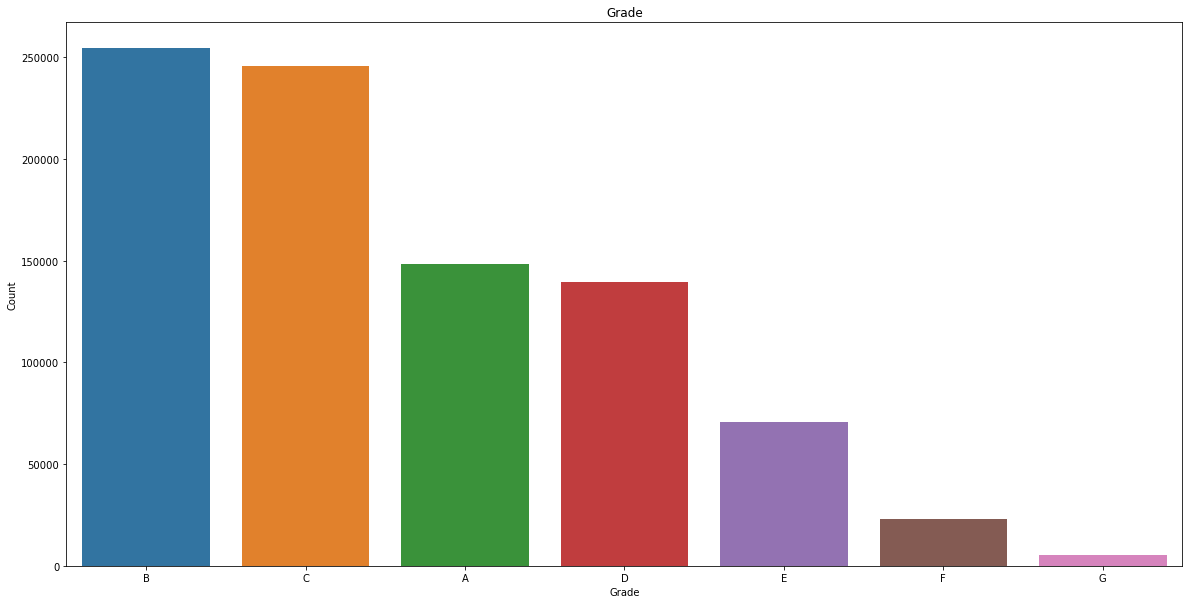

In [24]:
plt.subplots(figsize=(20,10))
sns.barplot(y='Count', x='Grade', data=grade)
plt.ylabel('Count')
plt.title('Grade')
plt.show()

In the Grade column majority of loan are in Grade B and then C

# Home Ownership

In [25]:
Home_Ownership= df['home_ownership'].value_counts().to_frame().reset_index()
Home_Ownership.columns = ['home_ownership', 'Count']
Home_Ownership

,home_ownership,Count
0,MORTGAGE,443557
1,RENT,356117
2,OWN,87470
3,OTHER,182
4,NONE,50
5,ANY,3


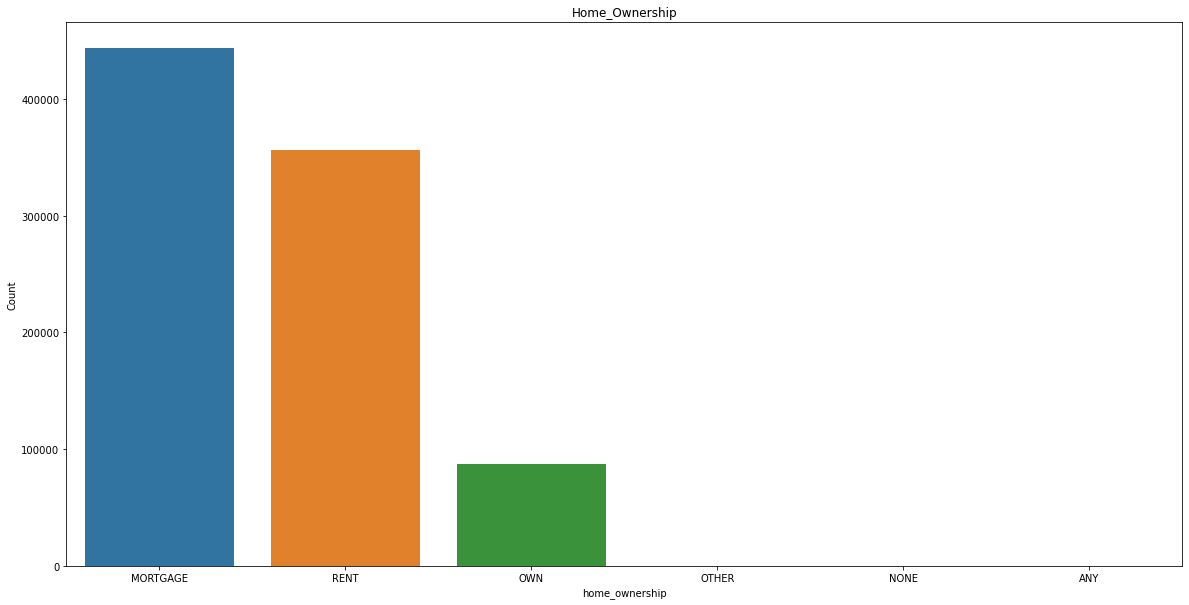

In [26]:
plt.subplots(figsize=(20,10))
sns.barplot(y='Count', x='home_ownership', data=Home_Ownership)
plt.ylabel('Count')
plt.title('Home_Ownership')
plt.show()

The majority of people who took the loan has Mortgage and next highest people lives in a Rent house

# Annual Income

In [27]:
Annual_Income=df['annual_inc'].value_counts().to_frame().reset_index()
Annual_Income.columns = ['annual_income', 'Count']
Annual_Income.sort_values(by=['annual_income'],ascending=False).head(10)

,annual_income,Count
23128,9500000.0,1
27434,9000000.0,1
35004,8900060.0,1
16844,8706582.0,1
16530,8700000.0,1
15847,8500021.0,1
30370,8253000.0,1
41769,8121180.0,1
16398,7600000.0,1
42668,7500000.0,1


In [28]:
Annual_Income.sort_values(by=['Count'],ascending=False).head(10)

,annual_income,Count
0,60000.0,34281
1,50000.0,30575
2,65000.0,25498
3,70000.0,24121
4,40000.0,23943
5,80000.0,22729
6,45000.0,22699
7,75000.0,22435
8,55000.0,20755
9,90000.0,17159


There is only One Person with Highest Annual Income and Majority of people has 6 lakhs per annum.

# State

In [29]:
State= df['addr_state'].value_counts().to_frame().reset_index()
State.columns = ['State', 'Count']
State.head()

,State,Count
0,CA,129517
1,NY,74086
2,TX,71138
3,FL,60935
4,IL,35476


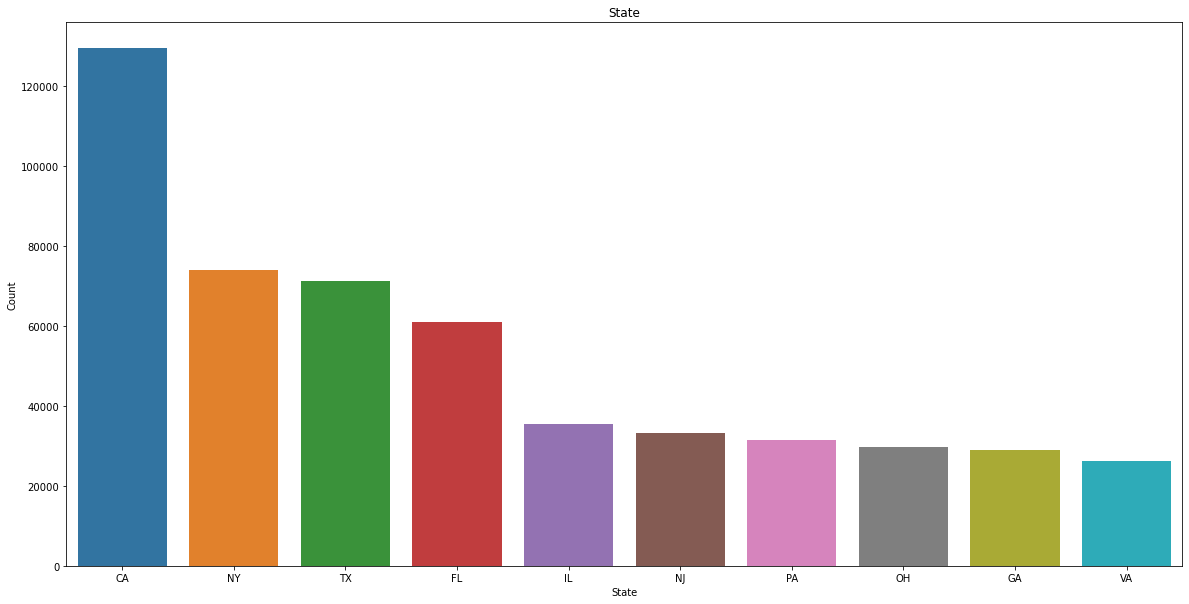

In [30]:
plt.subplots(figsize=(20,10))
sns.barplot(y='Count', x='State', data=State.head(10))
plt.ylabel('Count')
plt.title('State')
plt.show()

The majority of people are from Ca Califorina

# Enquiry

In [31]:
Enquiry= df['inq_last_6mths'].value_counts().to_frame().reset_index()
Enquiry.columns = ['Enquiry', 'Count']
Enquiry.head(10)

,Enquiry,Count
0,0.0,497905
1,1.0,241494
2,2.0,94117
3,3.0,37398
4,4.0,10758
5,5.0,3985
6,6.0,1231
7,7.0,195
8,8.0,122
9,9.0,50


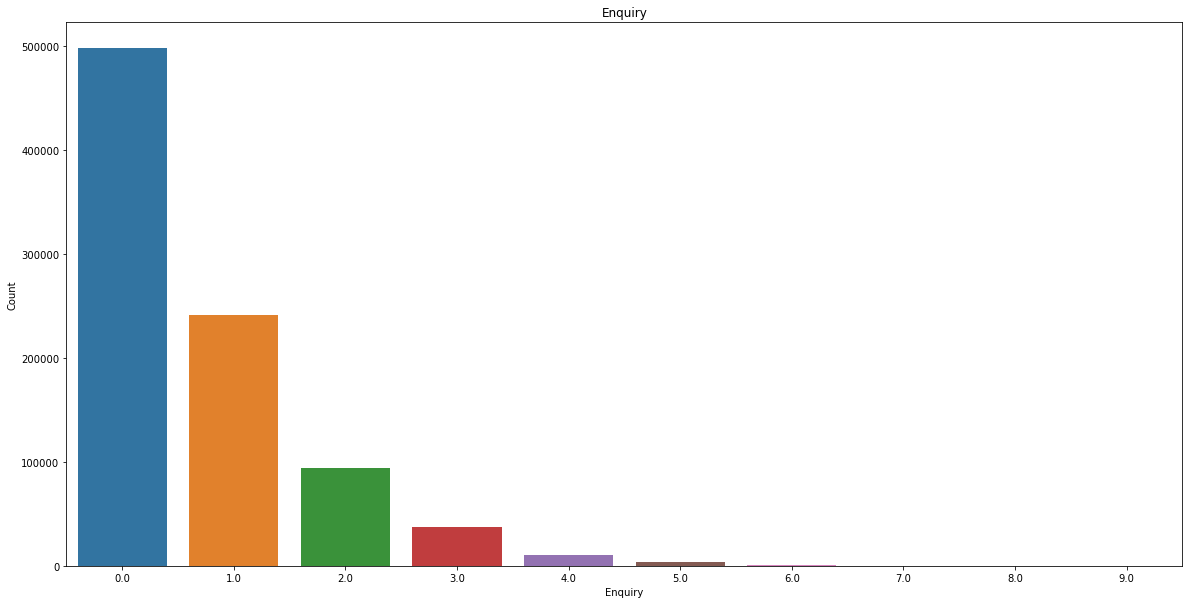

In [32]:
plt.subplots(figsize=(20,10))
sns.barplot(y='Count', x='Enquiry', data=Enquiry.head(10))
plt.ylabel('Count')
plt.title('Enquiry')
plt.show()

Interestingly the Highest number people who took the loan are didnt even enquired and Next highest people enquired only once in last 6 months

# Debt Income Ratio

In [33]:
dti= df['dti'].value_counts().to_frame().reset_index()
dti.columns = ['dti', 'Count']
dti

,dti,Count
0,19.20,684
1,14.40,674
2,18.00,661
3,13.20,638
4,16.80,632
...,...,...
4081,54.36,1
4082,63.64,1
4083,42.10,1
4084,61.21,1


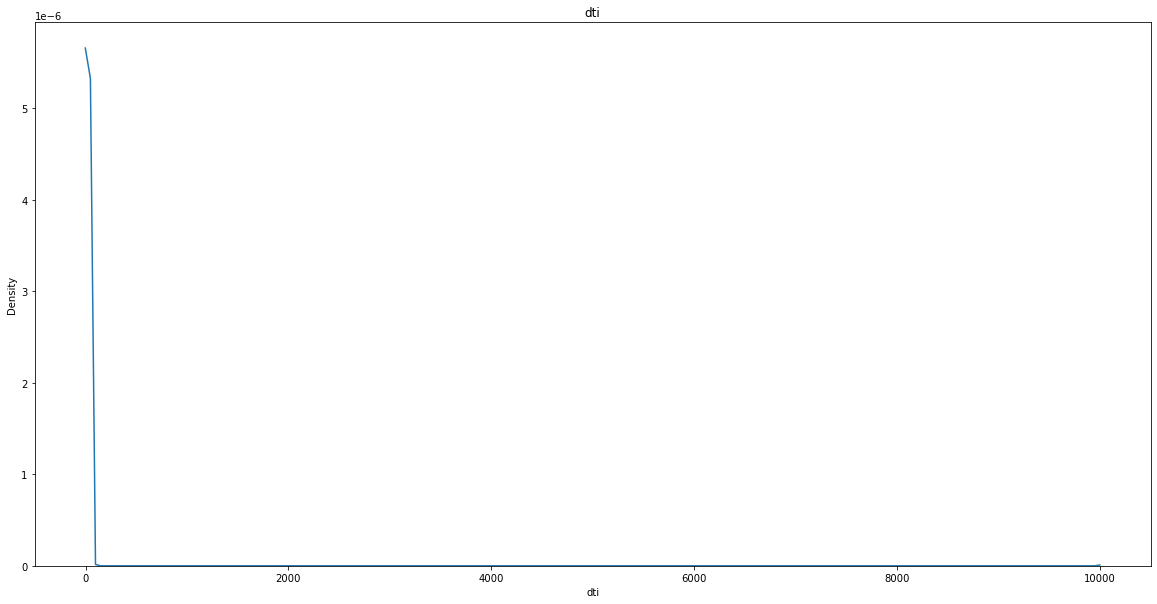

In [34]:
plt.subplots(figsize=(20,10))
sns.kdeplot(df['dti'])
plt.title('dti')
plt.show()

Its extremly skewed

# Verification_status

In [35]:
verification_status= df['verification_status'].value_counts().to_frame().reset_index()
verification_status.columns = ['status', 'Count']
verification_status

,status,Count
0,Source Verified,329558
1,Verified,291071
2,Not Verified,266750


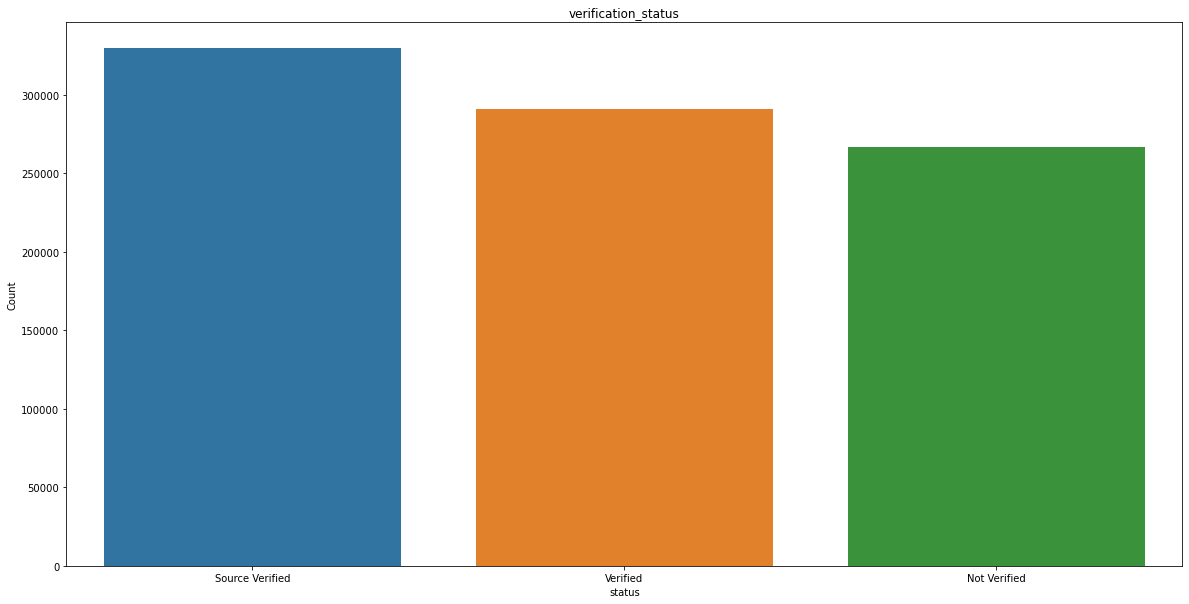

In [36]:
plt.subplots(figsize=(20,10))
sns.barplot(y='Count', x='status', data=verification_status)
plt.ylabel('Count')
plt.title('verification_status')
plt.show()

The majority of applicant details are verified and they ratio of not verifed are also more

# Experience

In [37]:
Experience=df['emp_length'].value_counts().to_frame().reset_index()
Experience.columns = ['Experience', 'Count']
Experience

,Experience,Count
0,10+ years,291569
1,2 years,78870
2,< 1 year,70605
3,3 years,70026
4,1 year,57095
5,5 years,55704
6,4 years,52529
7,7 years,44594
8,8 years,43955
9,6 years,42950


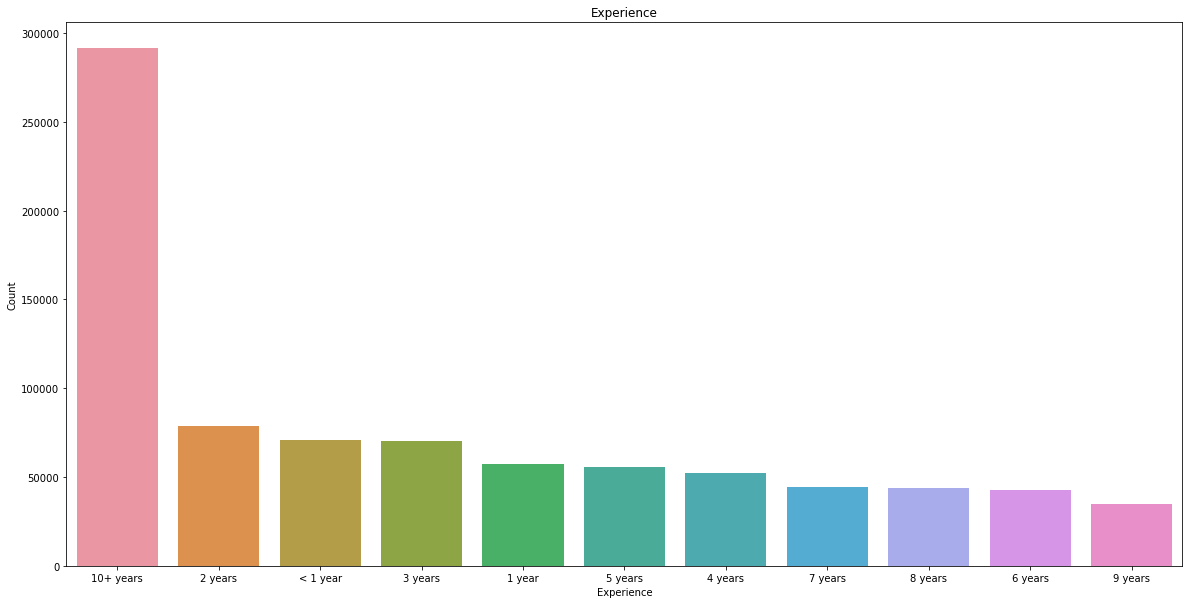

In [38]:
plt.subplots(figsize=(20,10))
sns.barplot(y='Count', x='Experience', data=Experience)
plt.ylabel('Count')
plt.title('Experience')
plt.show()

The majority of people who to loan has 10 + years of experience

# Data Cleaning

In [39]:
df.drop(columns=['funded_amnt', 'funded_amnt_inv','emp_title','desc','mths_since_last_record','mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m','total_pymnt_inv'],axis=1,inplace=True)

In [40]:
df.dropna(subset=['title','earliest_cr_line','open_acc','pub_rec','revol_util','total_acc','last_pymnt_d',
'last_credit_pull_d','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'], inplace=True)

In [41]:
df['emp_length'].fillna(0,inplace=True)

In [42]:
df.drop(columns=['id','member_id','title','sub_grade','url','zip_code','earliest_cr_line','mths_since_last_delinq', 'total_rec_late_fee', 'recoveries','out_prncp', 'out_prncp_inv','next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq','pymnt_plan','total_rec_prncp','last_pymnt_d','last_pymnt_amnt', 'tot_coll_amt','tot_cur_bal', 'total_rev_hi_lim','collection_recovery_fee'],axis=1,inplace=True)

In [43]:
df = df[df.loan_status != 'Current']
df = df[df.loan_status != 'In Grace Period']
df = df[df.loan_status != 'Late (16-30 days)']
df = df[df.loan_status != 'Late (31-120 days)']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Charged Off']
df = df[df.loan_status != 'Issued']

In [44]:
df['loan_status'] = df['loan_status'].replace({'Charged Off':'Default'})

In [45]:
df.reset_index(inplace=True)

In [46]:
df.drop('index',axis=1,inplace=True)

In [47]:
df['issue_d']=pd.to_datetime(df['issue_d']).dt.year

In [48]:
df["emp_length"] = df["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df["emp_length"] = df["emp_length"].apply(lambda x:int(x))

# Data Anaylsis After Cleaning

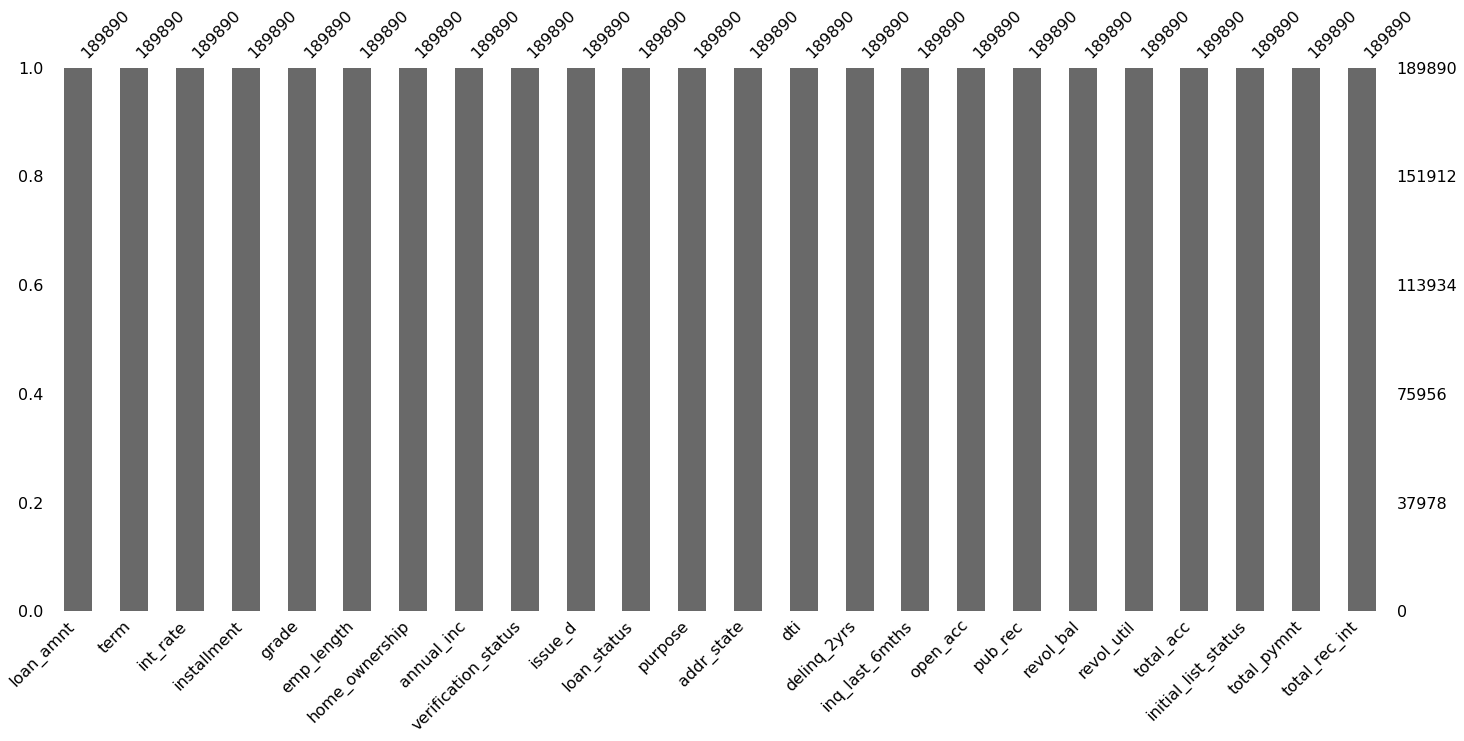

In [49]:
msno.bar(df)
plt.show()

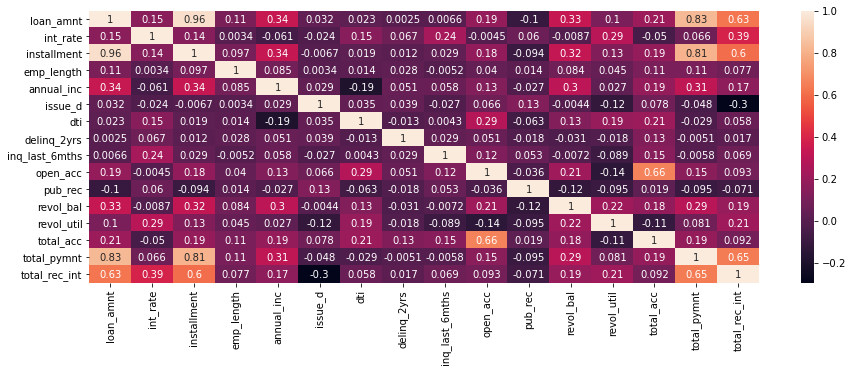

In [50]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [51]:
pd.crosstab(df['loan_status'],df['term'])

term,36 months,60 months
loan_status,,
Default,23054,12915
Fully Paid,122253,31668


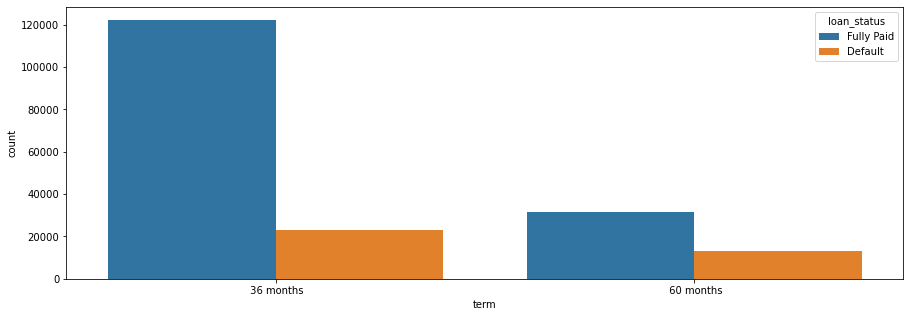

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(df['term'],hue=df['loan_status'])
plt.show()

Seems Like The Term 36 months are more took loans in Both category of Loan status and Overall the Fully paid is the More in both Terms 

In [53]:
pd.crosstab(df['loan_status'],df['home_ownership'])

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Default,0,16097,7,8,3239,16618
Fully Paid,1,81185,33,34,13807,58861


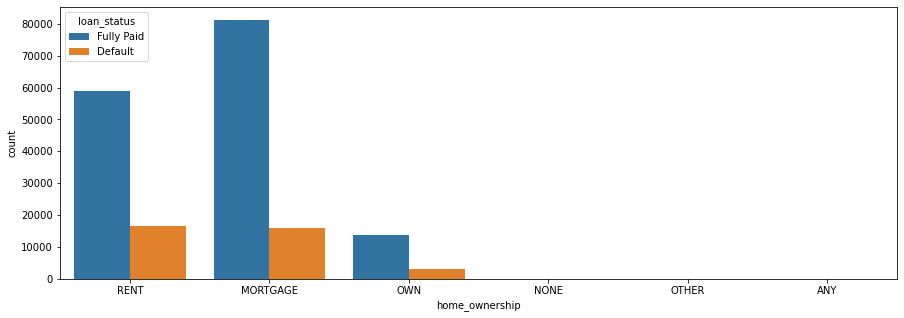

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(df['home_ownership'],hue=df['loan_status'])
plt.show()

The majority of people How to loan are Lives with Mortgage and then next highest are lives in Rent. In the Mortgage and Rent the Fully paid are highest 

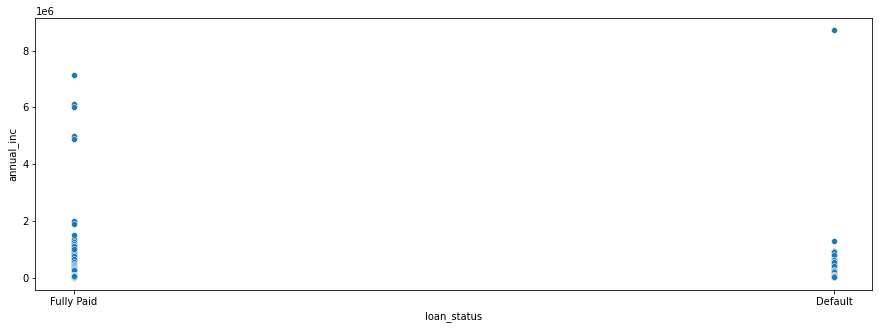

In [55]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['loan_status'],df['annual_inc'])
plt.show()

The Majority of Annual Income of Fully Paid Lies in between 0 to 200000 and The Highest Annual Income of a person Lies in Default Category

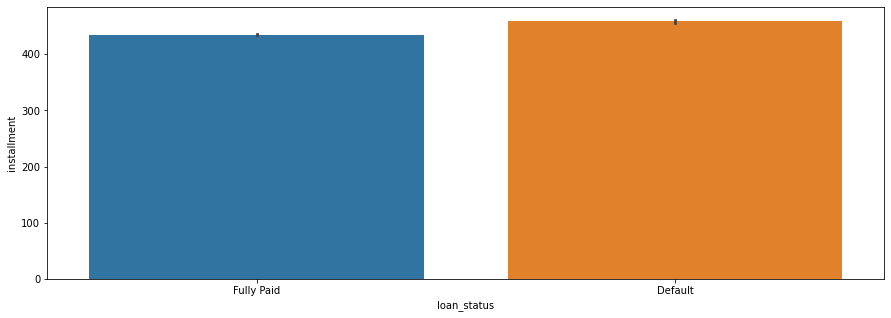

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(df['loan_status'],df['installment'])
plt.show()

Looks like the Installment rate is Highest in the Default Category 

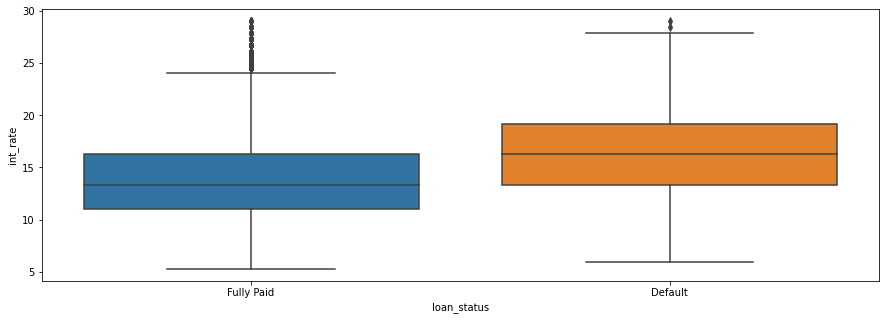

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['loan_status'],y=df['int_rate'])
plt.show()

By this we can see that we have more Outliers in the Fully paid category than Default 

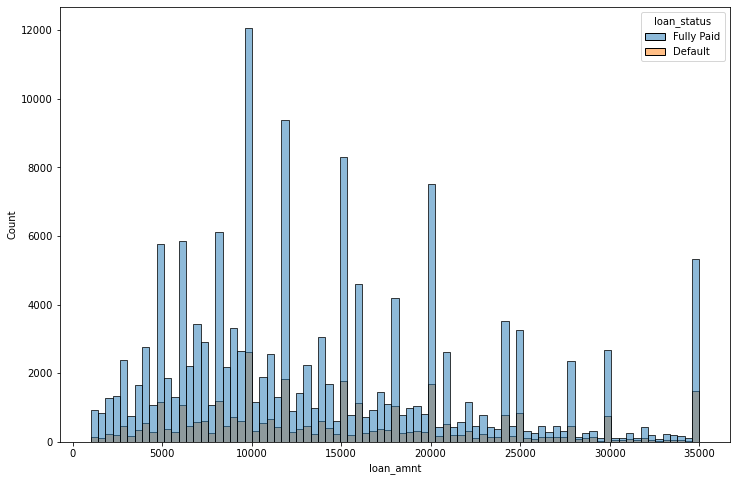

In [58]:
plt.figure(figsize=(12,8))
sns.histplot(x=df['loan_amnt'],hue=df['loan_status'])
plt.show()

Seems that in the around 10,000 of the loan amount is High in the both Category of Loan Status

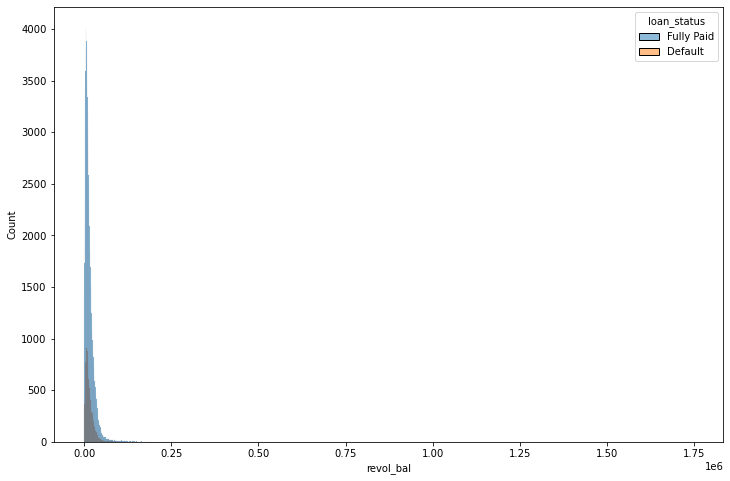

In [59]:
plt.figure(figsize=(12,8))
sns.histplot(x=df['revol_bal'],hue=df['loan_status'])
plt.show()

# Outliers

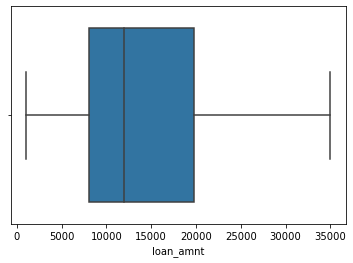

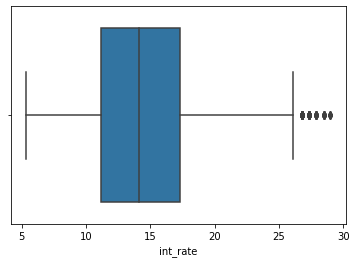

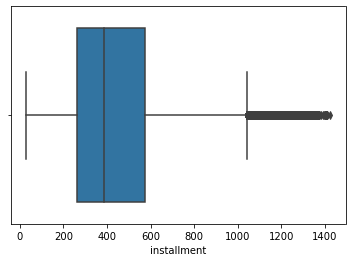

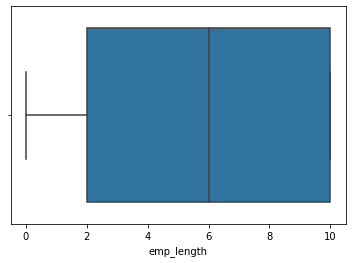

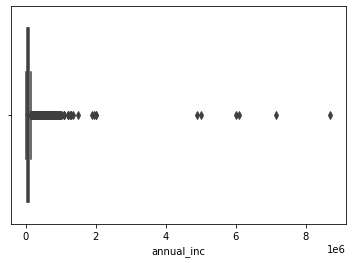

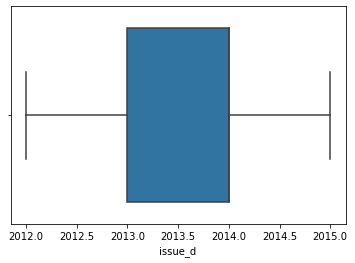

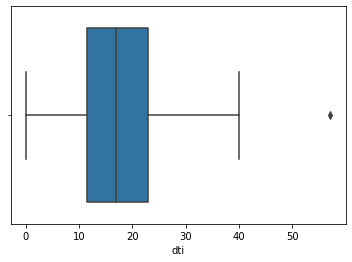

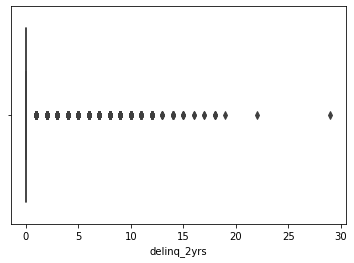

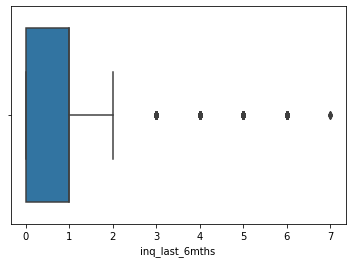

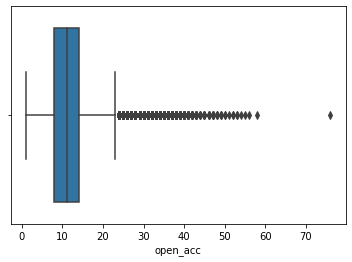

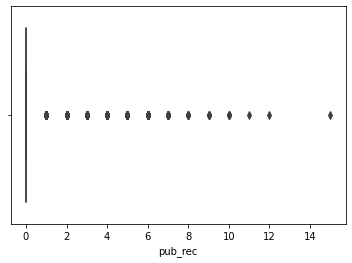

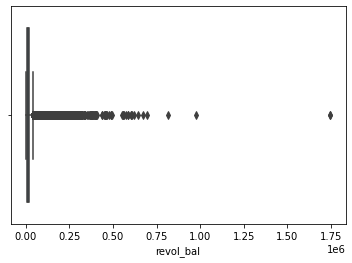

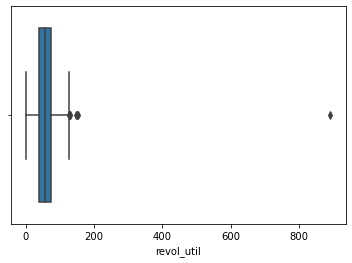

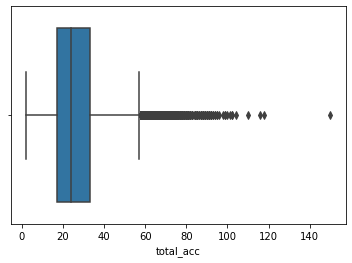

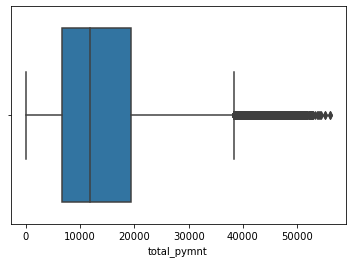

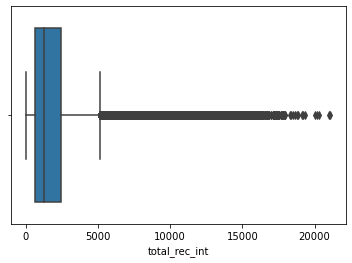

In [60]:
for i in df.columns:
    if df[i].dtypes != 'object':
        sns.boxplot(df[i])
        plt.show()

In [61]:
q1=df['int_rate'].quantile(.25)
q3=df['int_rate'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['int_rate']<LL) | (df['int_rate']>UL )]))

q1 11.14 
q3 17.27 
IQR 6.129999999999999 
UL 26.464999999999996 
LL 1.945000000000002
No.of Outliers are present -  91


In [62]:
q1=df['installment'].quantile(.25)
q3=df['installment'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['installment']<LL) | (df['installment']>UL )]))

q1 262.45 
q3 573.7 
IQR 311.25000000000006 
UL 1040.5750000000003 
LL -204.42500000000013
No.of Outliers are present -  5205


In [63]:
q1=df['annual_inc'].quantile(.25)
q3=df['annual_inc'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['annual_inc']<LL) | (df['annual_inc']>UL )]))

q1 45700.0 
q3 90000.0 
IQR 44300.0 
UL 156450.0 
LL -20750.0
No.of Outliers are present -  7542


In [64]:
q1=df['dti'].quantile(.25)
q3=df['dti'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['dti']<LL) | (df['dti']>UL )]))

q1 11.41 
q3 22.96 
IQR 11.55 
UL 40.285000000000004 
LL -5.915000000000003
No.of Outliers are present -  1


In [65]:
q1=df['delinq_2yrs'].quantile(.25)
q3=df['delinq_2yrs'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['delinq_2yrs']<LL) | (df['delinq_2yrs']>UL )]))

q1 0.0 
q3 0.0 
IQR 0.0 
UL 0.0 
LL 0.0
No.of Outliers are present -  34031


In [66]:
q1=df['inq_last_6mths'].quantile(.25)
q3=df['inq_last_6mths'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['inq_last_6mths']<LL) | (df['inq_last_6mths']>UL )]))

q1 0.0 
q3 1.0 
IQR 1.0 
UL 2.5 
LL -1.5
No.of Outliers are present -  16301


In [67]:
q1=df['open_acc'].quantile(.25)
q3=df['open_acc'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['open_acc']<LL) | (df['open_acc']>UL )]))

q1 8.0 
q3 14.0 
IQR 6.0 
UL 23.0 
LL -1.0
No.of Outliers are present -  4453


In [68]:
q1=df['pub_rec'].quantile(.25)
q3=df['pub_rec'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['pub_rec']<LL) | (df['pub_rec']>UL )]))

q1 0.0 
q3 0.0 
IQR 0.0 
UL 0.0 
LL 0.0
No.of Outliers are present -  28266


In [69]:
q1=df['revol_bal'].quantile(.25)
q3=df['revol_bal'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['revol_bal']<LL) | (df['revol_bal']>UL )]))

q1 6252.0 
q3 19573.0 
IQR 13321.0 
UL 39554.5 
LL -13729.5
No.of Outliers are present -  9492


In [70]:
q1=df['revol_util'].quantile(.25)
q3=df['revol_util'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['revol_util']<LL) | (df['revol_util']>UL )]))

q1 37.9 
q3 73.7 
IQR 35.800000000000004 
UL 127.4 
LL -15.800000000000004
No.of Outliers are present -  8


In [71]:
q1=df['total_acc'].quantile(.25)
q3=df['total_acc'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['total_acc']<LL) | (df['total_acc']>UL )]))

q1 17.0 
q3 33.0 
IQR 16.0 
UL 57.0 
LL -7.0
No.of Outliers are present -  2913


In [72]:
q1=df['total_pymnt'].quantile(.25)
q3=df['total_pymnt'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['total_pymnt']<LL) | (df['total_pymnt']>UL )]))

q1 6589.7025 
q3 19313.309715 
IQR 12723.607215 
UL 38398.720537500005 
LL -12495.708322500002
No.of Outliers are present -  4379


In [73]:
q1=df['total_rec_int'].quantile(.25)
q3=df['total_rec_int'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['total_rec_int']<LL) | (df['total_rec_int']>UL )]))

q1 609.255 
q3 2414.5699999999997 
IQR 1805.3149999999996 
UL 5122.5425 
LL -2098.7174999999993
No.of Outliers are present -  12427


# Dropping the Columns 

In [74]:
df.drop(['pub_rec','delinq_2yrs'],axis=1,inplace=True)

# Dropping the Outliers

In [75]:
q1=df['dti'].quantile(.25)
q3=df['dti'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['dti']<LL) | (df['dti']>UL )]))
df=df[(df['dti']>LL) & (df['dti']<UL )]

q1 11.41 
q3 22.96 
IQR 11.55 
UL 40.285000000000004 
LL -5.915000000000003
No.of Outliers are present -  1


In [76]:
q1=df['revol_util'].quantile(.25)
q3=df['revol_util'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print('q1',q1,'\n''q3',q3,'\n''IQR',IQR,'\n''UL',UL,'\n''LL',LL)
print('No.of Outliers are present - ',len(df[(df['revol_util']<LL) | (df['revol_util']>UL )]))
df=df[(df['revol_util']>LL) & (df['revol_util']<UL )]

q1 37.9 
q3 73.7 
IQR 35.800000000000004 
UL 127.4 
LL -15.800000000000004
No.of Outliers are present -  8


# Capping Method for Outliers

In [136]:
df1=df.copy()

In [137]:
cols=df1[['int_rate','installment','annual_inc','open_acc','revol_bal','total_acc','total_pymnt','total_rec_int']]

In [138]:
def Outlier_capping(df,cols):
    for i in cols:
        q1=df[i].quantile(.25)
        q3=df[i].quantile(.75)
        UL=q3+1.5*IQR
        LL=q1-1.5*IQR
        
        df1[i]=np.where(df[i]>UL,UL,df[i])

In [139]:
Outlier_capping(df1,cols)

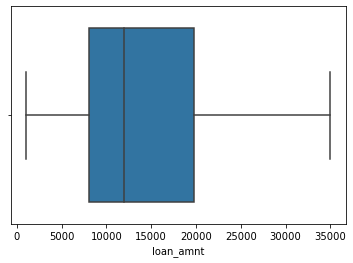

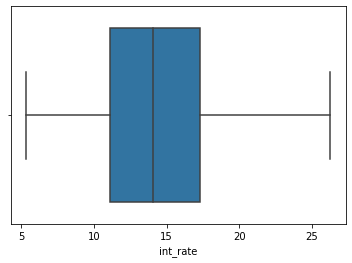

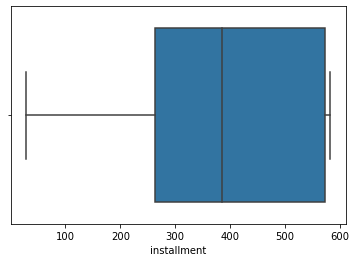

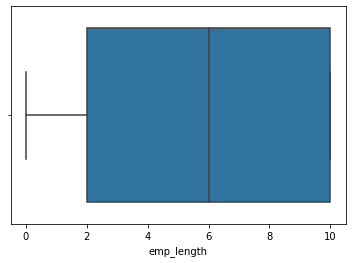

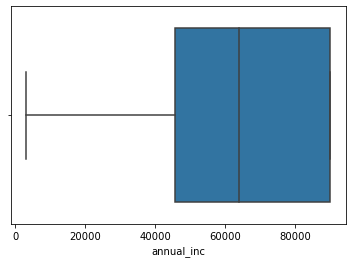

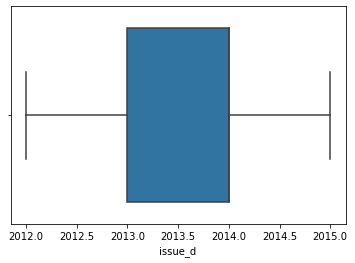

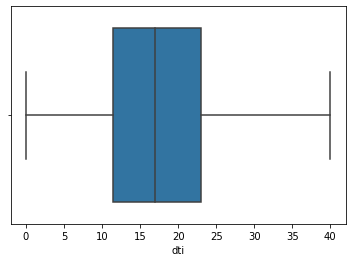

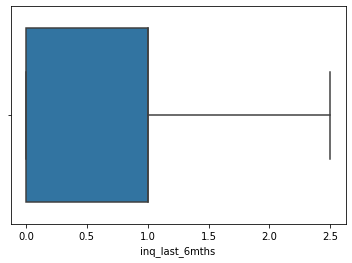

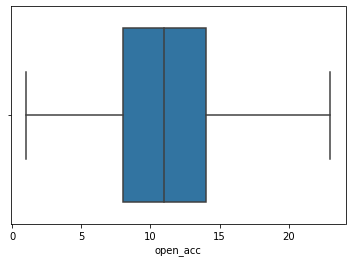

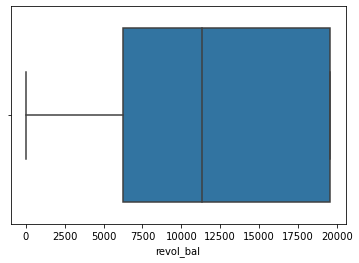

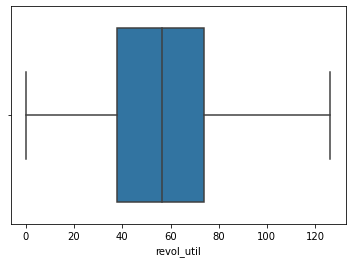

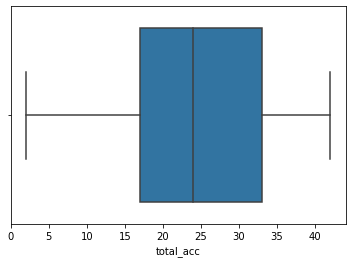

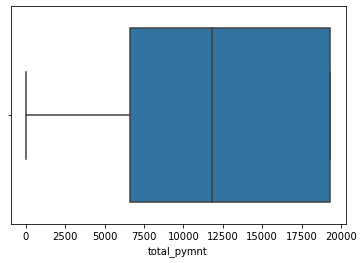

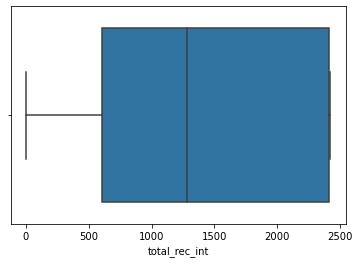

In [144]:
for i in df1.columns:
    if df1[i].dtypes != 'object':
        sns.boxplot(df1[i])
        plt.show()

In [120]:
print(df1['int_rate'].quantile(.25))
print(df1['int_rate'].quantile(.75))
q1=df1['int_rate'].quantile(.25)
q3=df1['int_rate'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print(UL)
print(LL)
print(df1['int_rate'].max())
print(df1['int_rate'].min())

11.14
17.27
26.464999999999996
1.945000000000002
26.464999999999996
5.32


In [106]:
df1['int_rate']=np.where((df1['int_rate']>26),26,df1['int_rate'])

<AxesSubplot:xlabel='int_rate'>

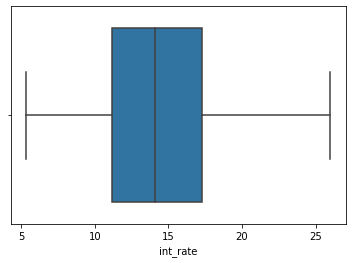

In [107]:
sns.boxplot(df1['int_rate'])

In [148]:
q1=df1['inq_last_6mths'].quantile(.25)
q3=df1['inq_last_6mths'].quantile(.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
print(UL)
print(LL)
print(df1['inq_last_6mths'].max())
print(df1['inq_last_6mths'].min())

2.5
-1.5
2.5
0.0


In [142]:
df1['inq_last_6mths']=np.where((df1['inq_last_6mths']>2.5),2.5,df1['inq_last_6mths'])

<AxesSubplot:xlabel='inq_last_6mths'>

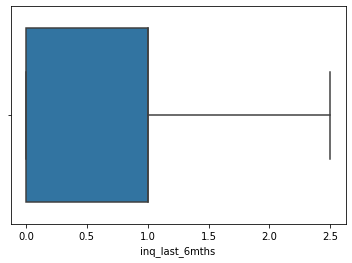

In [143]:
sns.boxplot(df1['inq_last_6mths'])

# Final Data

In [153]:
df2=df1.copy()

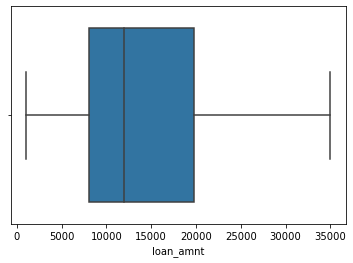

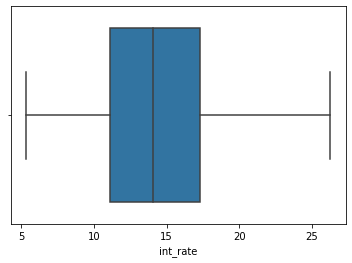

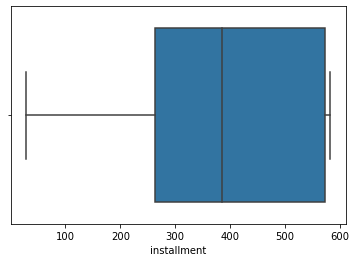

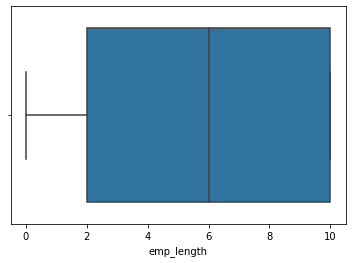

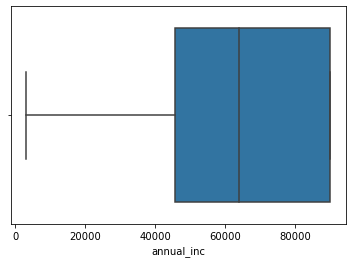

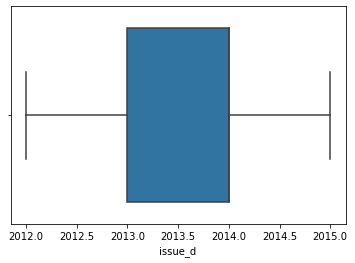

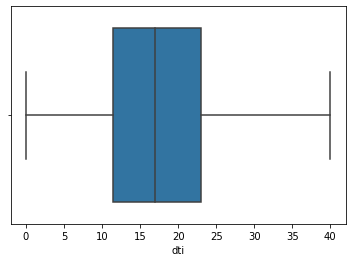

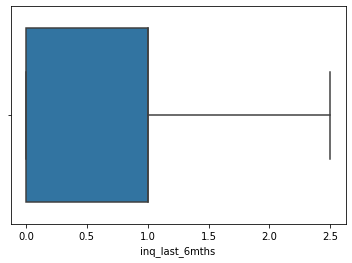

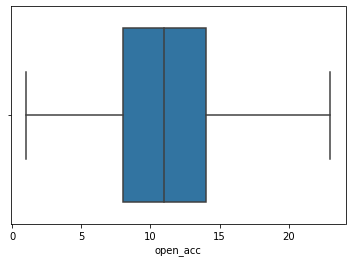

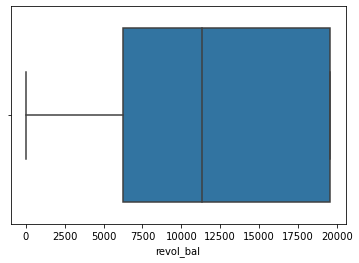

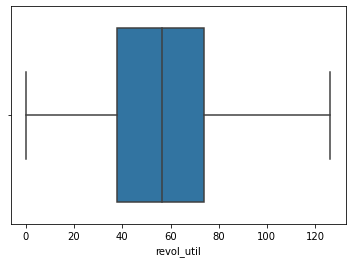

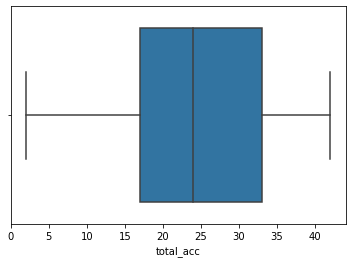

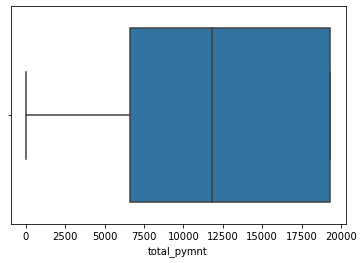

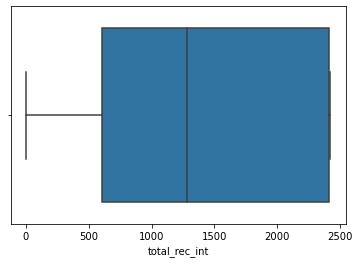

In [154]:
for i in df1.columns:
    if df1[i].dtypes != 'object':
        sns.boxplot(df1[i])
        plt.show()

In [156]:
df2

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_int
0,12000,36 months,13.53,407.40,B,10,RENT,40000.0,Source Verified,2013,...,NM,16.94,0.0,7.0,5572.0,68.8,32.0,w,13359.770000,1359.78
1,3000,36 months,12.85,100.87,B,10,RENT,25000.0,Verified,2013,...,FL,24.68,0.0,5.0,2875.0,54.2,26.0,f,3181.532981,181.53
2,28000,36 months,7.62,582.70,A,5,MORTGAGE,90009.0,Source Verified,2013,...,CA,18.55,1.0,15.0,19582.0,54.6,31.0,w,19322.109905,1150.98
3,24000,36 months,13.53,582.70,B,10,MORTGAGE,90009.0,Verified,2013,...,MI,22.18,0.0,14.0,19582.0,76.7,39.0,w,19322.109905,2423.55
4,15000,36 months,14.47,516.10,C,10,RENT,90009.0,Not Verified,2013,...,NY,6.15,2.0,16.0,5749.0,22.3,16.0,f,15699.030000,699.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189885,4200,36 months,15.99,147.64,D,10,MORTGAGE,48000.0,Verified,2015,...,CO,36.93,0.0,13.0,12943.0,63.4,42.0,f,1026.020000,358.06
189886,10775,36 months,6.03,327.95,A,1,RENT,54000.0,Not Verified,2015,...,FL,13.22,0.0,9.0,10776.0,25.8,21.0,w,11071.870000,296.87
189887,6225,36 months,16.49,220.37,D,2,RENT,27000.0,Source Verified,2015,...,FL,18.58,1.0,3.0,1756.0,97.6,4.0,f,7050.460000,825.46
189888,4000,36 months,8.67,126.59,B,10,MORTGAGE,50000.0,Verified,2015,...,CA,12.63,0.0,11.0,1700.0,5.6,30.0,f,4158.020000,158.02


# Feature Encoding

In [157]:
cat_cols=df2.select_dtypes(include='O').columns
cat_cols

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

In [158]:
df2= pd.get_dummies(columns=['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'addr_state', 'initial_list_status'],data=df2, drop_first=True)

In [159]:
df2['loan_status']=df2['loan_status'].replace({'Fully Paid':1,'Default':0})

In [160]:
df2

,loan_amnt,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,inq_last_6mths,open_acc,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,12000,13.53,407.40,10,40000.0,2013,1,16.94,0.0,7.0,...,0,0,0,0,0,0,0,0,0,1
1,3000,12.85,100.87,10,25000.0,2013,1,24.68,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,28000,7.62,582.70,5,90009.0,2013,1,18.55,1.0,15.0,...,0,0,0,0,0,0,0,0,0,1
3,24000,13.53,582.70,10,90009.0,2013,1,22.18,0.0,14.0,...,0,0,0,0,0,0,0,0,0,1
4,15000,14.47,516.10,10,90009.0,2013,1,6.15,2.0,16.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189885,4200,15.99,147.64,10,48000.0,2015,0,36.93,0.0,13.0,...,0,0,0,0,0,0,0,0,0,0
189886,10775,6.03,327.95,1,54000.0,2015,1,13.22,0.0,9.0,...,0,0,0,0,0,0,0,0,0,1
189887,6225,16.49,220.37,2,27000.0,2015,1,18.58,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
189888,4000,8.67,126.59,10,50000.0,2015,1,12.63,0.0,11.0,...,0,0,0,0,0,0,0,0,0,0
